In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gen1_train = pd.read_csv('adv-ml-2025/gen1_train_comp_final.csv')
gen1_train.head()

,gen1_id,sex_assigned_at_birth,age,SHgt_cm
0,774,F,0.10,56.961812
1,774,F,0.25,64.826190
2,774,F,0.50,74.340764
3,774,F,0.75,79.747338
4,774,F,1.00,84.092569


In [3]:
color_map = {'F': 0, 'M': 1}
colors = gen1_train['sex_assigned_at_birth'].map(color_map)


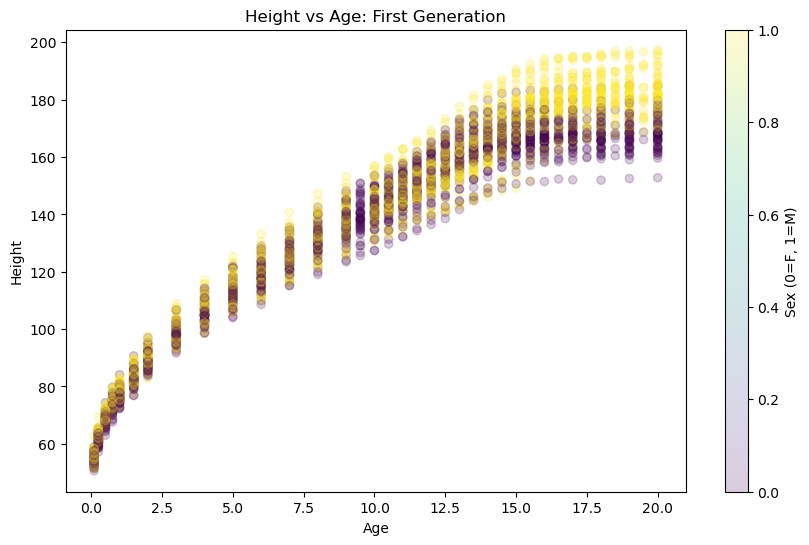

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(gen1_train['age'], gen1_train['SHgt_cm'], c=colors, cmap='viridis', alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Height vs Age: First Generation')
plt.colorbar(label='Sex (0=F, 1=M)')
plt.show() 


In [5]:
aux = gen1_train[gen1_train['age'] == 9.5][['sex_assigned_at_birth', 'SHgt_cm']]
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(aux))

,sex_assigned_at_birth,SHgt_cm
14,F,148.893552
50,F,138.175074
86,F,150.915149
122,F,135.205915
158,F,141.043145
194,F,147.074112
230,M,NaN
266,M,NaN
302,F,136.967405
338,M,NaN


In [6]:
gen1_train[gen1_train["SHgt_cm"].isna()].groupby(
    ["sex_assigned_at_birth", "age"]
).count()

gen1_id  SHgt_cm
sex_assigned_at_birth age                    
F                     0.10         1        0
                      0.25         2        0
                      0.75         2        0
                      1.50         3        0
                      3.00         2        0
                      5.00         2        0
                      6.00         1        0
                      9.50         1        0
                      10.00        1        0
                      15.00        1        0
                      15.50        3        0
                      16.50       19        0
                      17.00        2        0
                      17.50       35        0
                      18.00        1        0
                      18.50       41        0
                      19.00        3        0
                      19.50       47        0
M                     0.10         2        0
                      0.25         3        0
                      0.50         1        0
                      1.00         2        0
                      1.50         1        0
                      2.00         1        0
                      6.00         1        0
                      7.00         1        0
                      9.00         1        0
                      9.50        52        0
                      10.00        2        0
                      11.50        2        0
                      13.00        1        0
                      16.50        4        0
                      17.50       10        0
                      18.50       24        0
                      19.50       35        0

In [7]:
def impute_missing_height(df):
    # Create a mask of missing values before imputation
    missing_mask = df['SHgt_cm'].isna()
    
    # For ages 0.1 and 0.25, impute with median for that age
    early_ages = [0.1, 0.25]
    for age in early_ages:
        age_mask = (df['age'] == age) & missing_mask
        if age_mask.any():
            median_height = df[df['age'] == age]['SHgt_cm'].median()
            df.loc[age_mask, 'SHgt_cm'] = median_height
    
    # For other ages, perform interpolation within each gen1_id group
    df['SHgt_cm'] = df.groupby('gen1_id')['SHgt_cm'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))
    
    # Fallback: Fill remaining NaNs with group mean
    df['SHgt_cm'] = df.groupby('gen1_id')['SHgt_cm'].transform(lambda x: x.fillna(x.mean()))
    
    # Mark imputed values
    df['SHgt_imputed'] = missing_mask & df['SHgt_cm'].notna()
    
    return df

gen1_train_imputed = impute_missing_height(gen1_train)
gen1_train_imputed.head()


,gen1_id,sex_assigned_at_birth,age,SHgt_cm,SHgt_imputed
0,774,F,0.10,56.961812,False
1,774,F,0.25,64.826190,False
2,774,F,0.50,74.340764,False
3,774,F,0.75,79.747338,False
4,774,F,1.00,84.092569,False


In [8]:
gen1_train_imputed['SHgt_imputed'].value_counts()

SHgt_imputed
False    3326
True      310
Name: count, dtype: int64

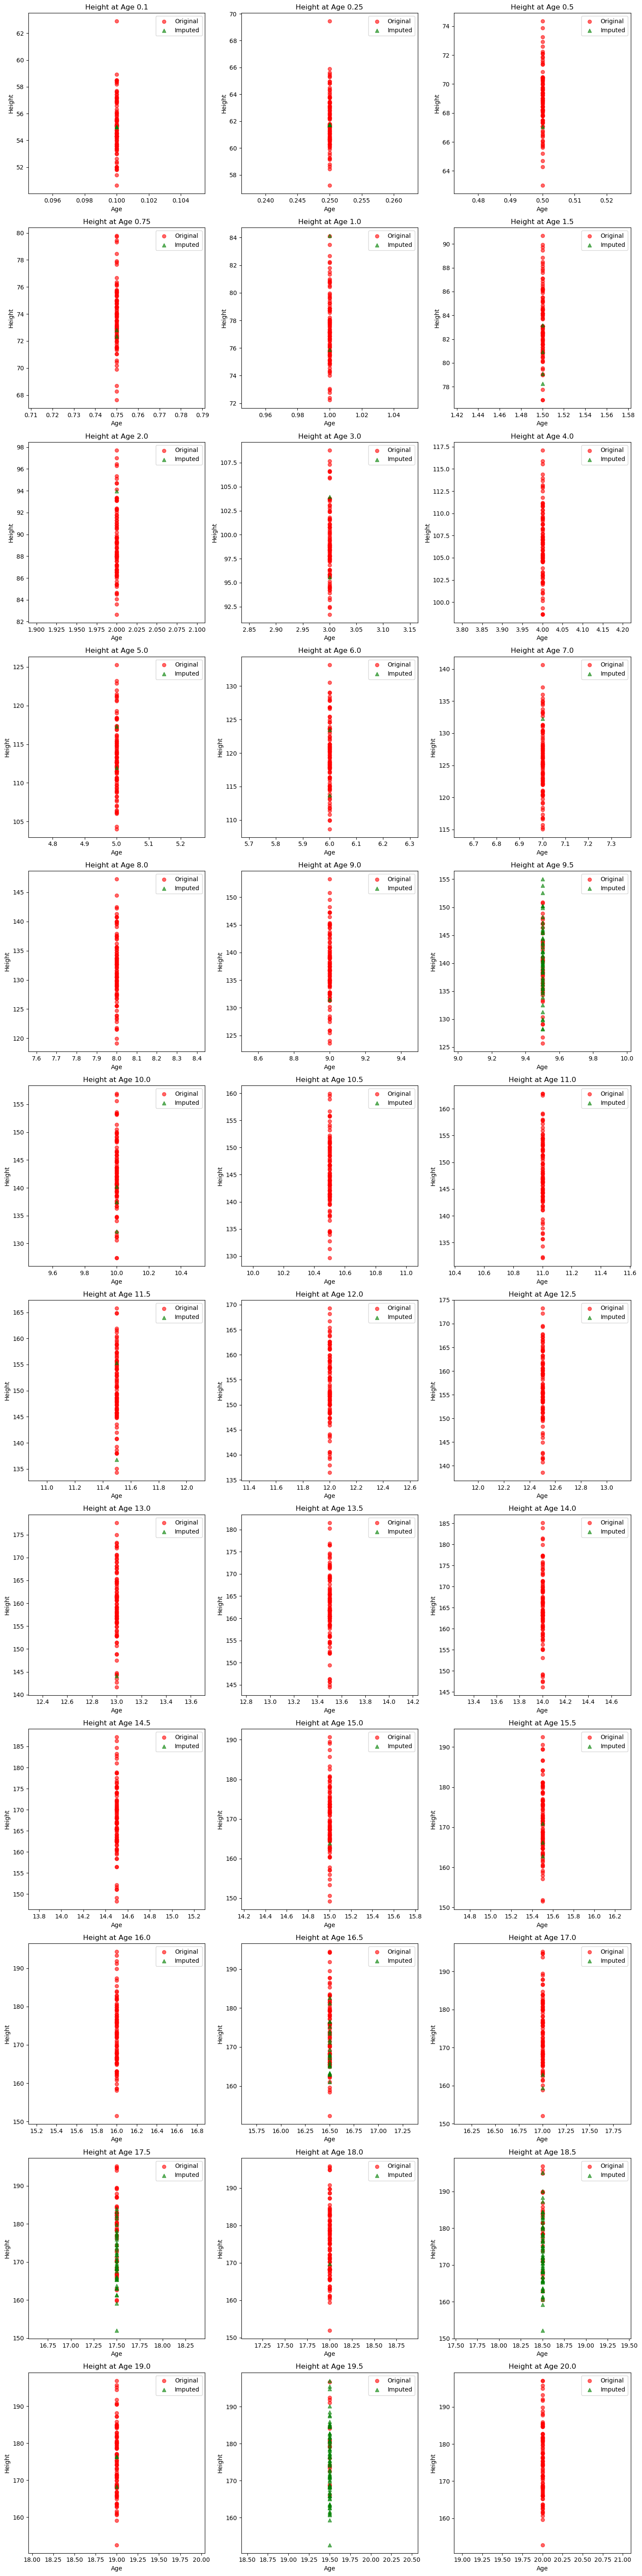

In [9]:
# Define colors and markers for imputed vs not imputed
color_map = {False: 'red', True: 'green'}
marker_map = {False: 'o', True: '^'}  # circle for original, triangle for imputed

unique_ages = sorted(gen1_train['age'].unique())
n_ages = len(unique_ages)
n_cols = 3
n_rows = (n_ages + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for idx, age in enumerate(unique_ages):
    plt.subplot(n_rows, n_cols, idx+1)
    age_data = gen1_train[gen1_train['age'] == age]
    
    # Plot non-imputed and imputed data separately with different colors and markers
    for imputed in [False, True]:
        mask = age_data['SHgt_imputed'] == imputed
        data = age_data[mask]
        plt.scatter(data['age'], data['SHgt_cm'], 
                   c=color_map[imputed],
                   marker=marker_map[imputed],
                   alpha=0.6,
                   label='Imputed' if imputed else 'Original')
    
    plt.xlabel('Age')
    plt.ylabel('Height')
    plt.title(f'Height at Age {age}')
    plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Create a mapping for sex_assigned_at_birth to numeric values
sex_mapping = {'F': 0, 'M': 1}

# Create a copy of the dataframe to avoid modifying the original
gen1_train_imputed = gen1_train.copy()

# Convert sex_assigned_at_birth to numeric using the mapping
gen1_train_imputed['sex_assigned_at_birth'] = gen1_train_imputed['sex_assigned_at_birth'].map(sex_mapping)

X_train = gen1_train_imputed[['gen1_id', 'age', 'sex_assigned_at_birth']]  
y_train = gen1_train_imputed['SHgt_cm']
# Fit the model on the training data
rf_model.fit(X_train, y_train)





RandomForestRegressor(n_estimators=10, random_state=42)

Root Mean Square Error on training data: 1.74 cm


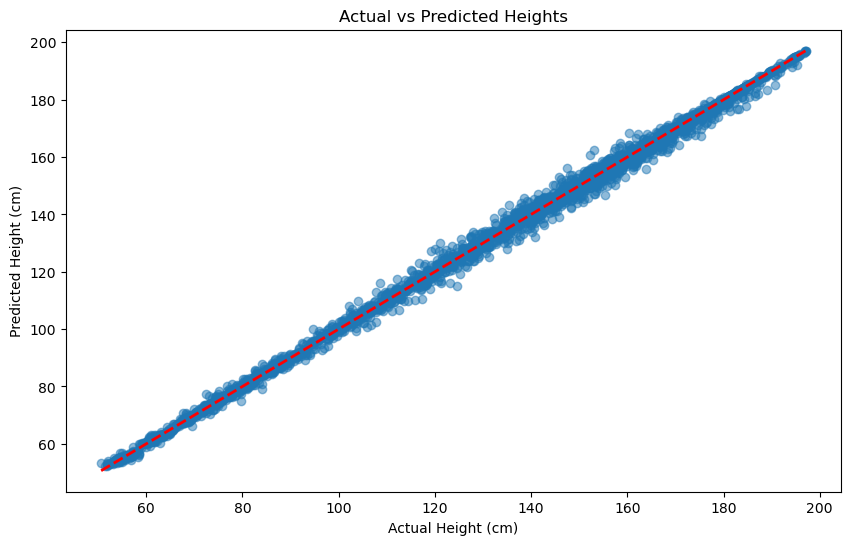

In [11]:
# Calculate out-of-bag error score
oob_score = rf_model.oob_score_ if hasattr(rf_model, 'oob_score_') else None

# Since oob_score is not enabled by default, let's calculate error manually using predictions
predictions = rf_model.predict(X_train)
mse = np.mean((y_train - predictions) ** 2)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error on training data: {rmse:.2f} cm")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Height (cm)')
plt.ylabel('Predicted Height (cm)')
plt.title('Actual vs Predicted Heights')
plt.show()


### SECOND GENERATION

In [12]:
gen2_train = pd.read_csv('adv-ml-2025/gen2_train_comp_final.csv')
gen2_train.head()

,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,3012,M,mother,636,0.10,56.251625,4.636903
1,3012,M,mother,636,0.25,64.491579,NaN
2,3012,M,mother,636,0.50,70.465927,NaN
3,3012,M,mother,636,0.75,73.992677,NaN
4,3012,M,mother,636,1.00,79.343537,NaN


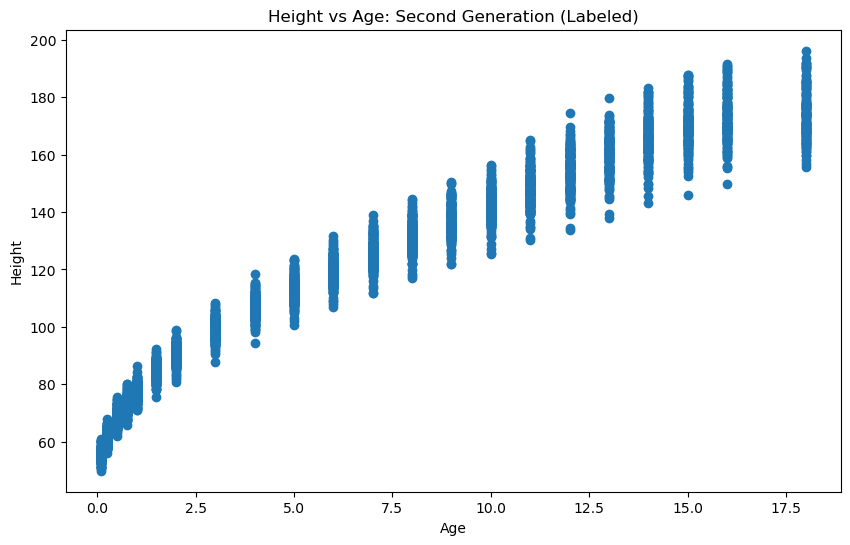

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(gen2_train['AgeGr'], gen2_train['SHgt_cm'])
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Height vs Age: Second Generation (Labeled)')
plt.show() 


Text(0.5, 1.0, 'Height vs Age: Second Generation (Labeled)')

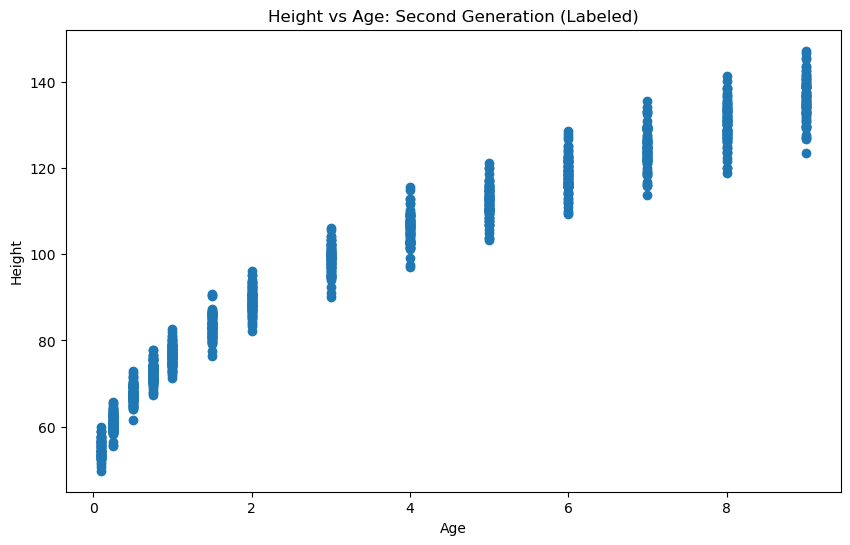

In [14]:
gen2_up_to_9 = pd.read_csv('adv-ml-2025/gen2_test_upto9_comp_final.csv')
plt.figure(figsize=(10, 6))
plt.scatter(gen2_up_to_9['AgeGr'], gen2_up_to_9['SHgt_cm'])
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Height vs Age: Second Generation (Labeled)')

In [15]:
gen2_up_to_9.head()


,gen2_id,sex_assigned_at_birth,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg
0,2831,F,mother,455,0.10,52.912025,NaN
1,2831,F,mother,455,0.25,59.532779,NaN
2,2831,F,mother,455,0.50,67.733527,NaN
3,2831,F,mother,455,0.75,70.450677,NaN
4,2831,F,mother,455,1.00,74.991937,NaN
